In [1]:
# InternalError: GPU sync failed
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
print("predict the forest cover type")

predict the forest cover type


In [44]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers.normalization import BatchNormalization
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
import numpy as np
import os
%matplotlib inline

In [4]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

In [5]:
df = pd.read_csv("train.csv.zip", index_col=0)

In [6]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [7]:
print("Q1: What columns are present in the dataframe?")

Q1: What columns are present in the dataframe?


In [8]:
# a lot of columns are present
print("Q1: answer")
df.columns

Q1: answer


Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [9]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [10]:
plt.rcParams['figure.figsize'] = [30, 15]
# for testing, but too much for the pc
#df.hist()

In [11]:
print("Q2: What is the distribution of the dependent variable?")

Q2: What is the distribution of the dependent variable?


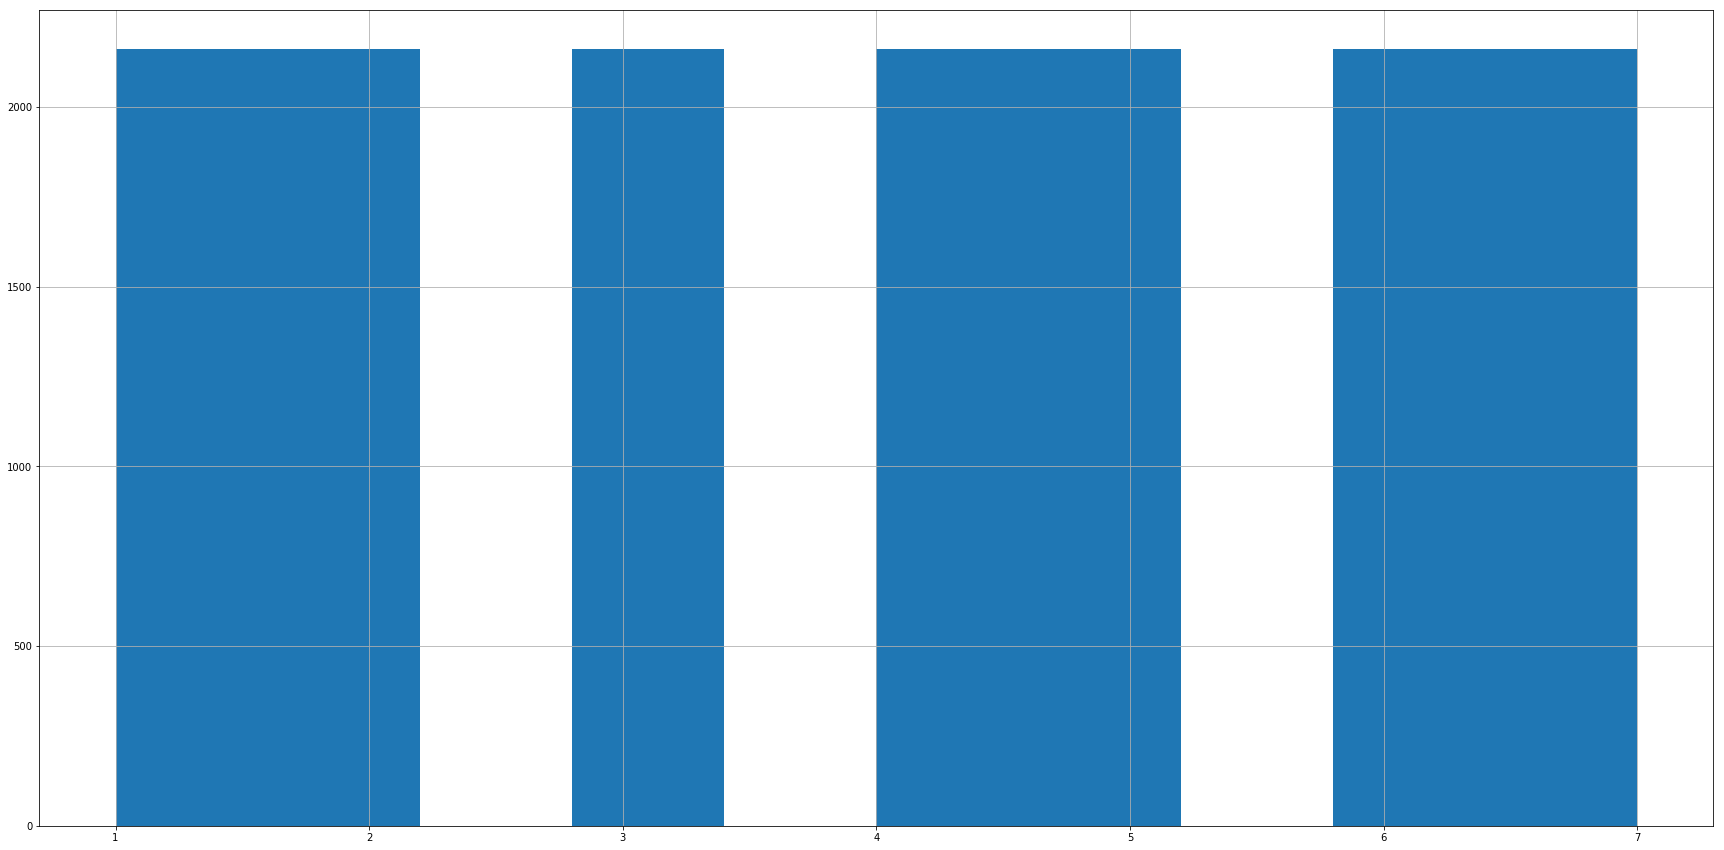

In [12]:
df_cover = df['Cover_Type']
df_cover.hist(bins=10)

In [13]:
print("Distribution is uniform...")

Distribution is uniform...


In [14]:
def load_data():
    df = pd.read_csv("train.csv.zip", index_col=0)
    y = df.Cover_Type
    print(y[0:5])
    y = to_categorical(y)
    print(y[0:5])
    X = df.drop(["Cover_Type"], axis=1)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.8)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.8)
    return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [15]:
print("Q3: In the above code, what purpose does to_categorical serve?")
print("to_categorical takes the dependent variable and converts it to a one-hot encoded binary vector. In smaller words, makes it looks like bad assembly code. The reason for this is maths, one-hot encoding allows the multiple classification problem to expression in a network. Example: we couldn't use soft max on dtype.object, or categorical_crossentropy loss couldn't be calculated")

Q3: In the above code, what purpose does to_categorical serve?
to_categorical takes the dependent variable and converts it to a one-hot encoded binary vector. In smaller words, makes it looks like bad assembly code. The reason for this is maths, one-hot encoding allows the multiple classification problem to expression in a network. Example: we couldn't use soft max on dtype.object, or categorical_crossentropy loss couldn't be calculated


In [16]:
def create_callbacks():
    tensorboard_callback = TensorBoard(log_dir=os.path.join(os.getcwd(), "tb_log", "5h_adam_20epochs"), histogram_freq=1, batch_size=32,
                                       write_graph=True, write_grads=False)

    #checkpoint_callback = ModelCheckpoint(filepath="./model-weights.{epoch:02d}-{val_acc:.6f}.hdf5", monitor='val_acc',
     #                                     verbose=1, save_best_only=True)

    return [tensorboard_callback] #, checkpoint_callback]

In [45]:
#note i have no idea what gloroot_uniform is.. at all 
def build_network(input_features=None, keep_prob=0.1,optimizer='adam', init_mode='glorot_uniform'):
    inputs = Input(shape=(input_features,), name="input")
    #implement the code to create a keras MLP here.  
    # remember your output layer will need to use softmax activation
    x = Dense(32, activation='relu', kernel_initializer=init_mode, kernel_regularizer='l2', name='hidden1')(inputs)   
    x = Dropout(keep_prob)(x)
    x = BatchNormalization()
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden2')(x)  
    x = BatchNormalization()
    x = Dropout(keep_prob)(x)    
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden3')(x)    
    x = BatchNormalization()
    x = Dropout(keep_prob)(x)
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden4')(x)    
    x = BatchNormalization()
    x = Dropout(keep_prob)(x)  
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden4')(x)    
    x = Dropout(keep_prob)(x)   
    x = Dense(16, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden4')(x)    
    x = Dropout(keep_prob)(x)   
    prediction = Dense(8, activation='softmax', name='output')(x)
    
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [ ]:
#note i have no idea what gloroot_uniform is.. at all 
def build_network(input_features=None, keep_prob=0.1,optimizer='adam', init_mode='glorot_uniform'):
    mode = Sequential()
    
    model.add(DenseDense(32, activation='relu', kernel_initializer=init_mode, kernel_regularizer='l2', name='hidden1')
    inputs = Input(shape=(input_features,), name="input")
    #implement the code to create a keras MLP here.  
    # remember your output layer will need to use softmax activation
    x = Dense(32, activation='relu', kernel_initializer=init_mode, kernel_regularizer='l2', name='hidden1')(inputs)   
    x = Dropout(keep_prob)(x)
    x = BatchNormalization()
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden2')(x)  
    x = BatchNormalization()
    x = Dropout(keep_prob)(x)    
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden3')(x)    
    x = BatchNormalization()
    x = Dropout(keep_prob)(x)
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden4')(x)    
    x = BatchNormalization()
    x = Dropout(keep_prob)(x)  
    x = Dense(32, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden4')(x)    
    x = Dropout(keep_prob)(x)   
    x = Dense(16, activation='relu', kernel_initializer=init_mode,kernel_regularizer='l2', name='hidden4')(x)    
    x = Dropout(keep_prob)(x)   
    prediction = Dense(8, activation='softmax', name='output')(x)
    
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [18]:
def build_network2(keep_prob=0.1,optimizer='adam', init_mode='uniform'):
    inputs = Input(shape=(54,), name="input")
    #implement the code to create a keras MLP here.  
    # remember your output layer will need to use softmax activation
    x = Dense(512, activation='relu', kernel_initializer=init_mode, name='hidden1')(inputs)   
    x = Dropout(keep_prob)(x)
    x = Dense(256, activation='relu',kernel_initializer=init_mode, name='hidden2')(x)  
    x = Dropout(keep_prob)(x)
    x = Dense(128, activation='relu',kernel_initializer=init_mode, name='hidden3')(x)    
    x = Dropout(keep_prob)(x)
    x = Dense(64, activation='relu',kernel_initializer=init_mode, name='hidden4')(x)    
    x = Dropout(keep_prob)(x)   
    prediction = Dense(8, activation='softmax', name='output')(x)
    
    #optimizer = Adadelta(lr=learn_rate, decay=decay)
    
    model = Model(inputs=inputs, outputs=prediction)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=["accuracy"])
    return model

In [46]:
X_train, X_val, X_test, y_train, y_val, y_test, scaler = load_data()
#callbacks = create_callbacks()
model = build_network(X_train.shape[1])

Id
1    5
2    5
3    2
4    2
5    5
Name: Cover_Type, dtype: int64
[[0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]


ValueError: Layer hidden2 was called with an input that isn't a symbolic tensor. Received type: <class 'keras.layers.normalization.BatchNormalization'>. Full input: [<keras.layers.normalization.BatchNormalization object at 0x0000029C006D9978>]. All inputs to the layer should be tensors.

In [20]:
def create_hyperparameters():
    batches = [5,10,15,20,30,32,50]
    optimizers= ['rmsprop','adam','nadam','adadelta']
    init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
    dropout = np.linspace(0.1,0.5,5)
    return {
        "batch_size": batches,
        "optimizer": optimizers,
        "keep_prob": dropout,
        "init_mode": init_mode
    }

In [21]:
# starting test: baseline 83% accuracy  prec 0.83 recall .084 f1-score 0.84 support 3780

In [22]:
#not sure if this is because i tried to pass a parameter to build_fn
#https://stackoverflow.com/questions/44855603/typeerror-cant-pickle-thread-lock-objects-in-seq2seq
setattr(tf.contrib.rnn.GRUCell, '__deepcopy__', lambda self, _: self)
setattr(tf.contrib.rnn.BasicLSTMCell, '__deepcopy__', lambda self, _: self)
setattr(tf.contrib.rnn.MultiRNNCell, '__deepcopy__', lambda self, _: self)

In [23]:
#wrap model and make capat with scikit-learn api 
model2 = KerasClassifier(build_fn=build_network2, verbose=0)
hyperparameters = create_hyperparameters()

In [28]:

# search through the parameter space of the model, whatever that entails 
# randomly choose values from the param distrb and apply to model, do this 10 times(n_iter) and try combo 3 times, 10*3
search = RandomizedSearchCV(estimator=model2, param_distributions=hyperparameters, n_iter=30, n_jobs=1, cv=3, verbose=1)

In [29]:
search.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 16.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000021CD325E860>,
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'batch_size': [5, 10, 15, 20, 30, 32, 50], 'optimizer': ['rmsprop', 'adam', 'nadam', 'adadelta'], 'keep_prob': array([0.1, 0.2, 0.3, 0.4, 0.5]), 'init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [30]:
#best parameters
# {'optimizer': 'adadelta', 'keep_prob': 0.1, 'batch_size': 10}
# {'optimizer': 'adadelta', 'keep_prob': 0.1, 'batch_size': 20}
# {'optimizer': 'adam', 'keep_prob': 0.1, 'init_mode': 'glorot_uniform', 'batch_size': 20}
print(search.best_params_)

{'optimizer': 'adam', 'keep_prob': 0.1, 'init_mode': 'glorot_uniform', 'batch_size': 20}


In [ ]:
print("stop!!!!!!!!! update build network params above and re-try!")

In [39]:
model.fit(x=X_train, y=y_train,
          batch_size=20,
          epochs=300,
          validation_data=(X_val, y_val),
          #callbacks = callbacks,
          verbose=2)

Train on 3024 samples, validate on 2419 samples
Epoch 1/300
 - 1s - loss: 1.0706 - acc: 0.6458 - val_loss: 0.9388 - val_acc: 0.7032
Epoch 2/300
 - 1s - loss: 1.0581 - acc: 0.6524 - val_loss: 0.9430 - val_acc: 0.7086
Epoch 3/300
 - 1s - loss: 1.0480 - acc: 0.6551 - val_loss: 0.9333 - val_acc: 0.7077
Epoch 4/300
 - 1s - loss: 1.0561 - acc: 0.6617 - val_loss: 0.9877 - val_acc: 0.6957
Epoch 5/300
 - 1s - loss: 1.0484 - acc: 0.6485 - val_loss: 0.9469 - val_acc: 0.6949
Epoch 6/300
 - 1s - loss: 1.0456 - acc: 0.6491 - val_loss: 0.9881 - val_acc: 0.6866
Epoch 7/300
 - 1s - loss: 1.0693 - acc: 0.6478 - val_loss: 0.9502 - val_acc: 0.6986
Epoch 8/300
 - 1s - loss: 1.0544 - acc: 0.6524 - val_loss: 0.9374 - val_acc: 0.7036
Epoch 9/300
 - 1s - loss: 1.0668 - acc: 0.6518 - val_loss: 0.9753 - val_acc: 0.6953
Epoch 10/300
 - 1s - loss: 1.0521 - acc: 0.6488 - val_loss: 0.9534 - val_acc: 0.6982
Epoch 11/300
 - 1s - loss: 1.0557 - acc: 0.6561 - val_loss: 0.9219 - val_acc: 0.7065
Epoch 12/300
 - 1s - loss:

Epoch 97/300
 - 1s - loss: 1.0167 - acc: 0.6617 - val_loss: 0.9247 - val_acc: 0.7177
Epoch 98/300
 - 1s - loss: 1.0431 - acc: 0.6657 - val_loss: 0.9393 - val_acc: 0.7032
Epoch 99/300
 - 1s - loss: 1.0423 - acc: 0.6627 - val_loss: 0.9299 - val_acc: 0.7115
Epoch 100/300
 - 1s - loss: 1.0301 - acc: 0.6624 - val_loss: 0.9229 - val_acc: 0.7123
Epoch 101/300
 - 1s - loss: 1.0279 - acc: 0.6620 - val_loss: 0.9396 - val_acc: 0.7115
Epoch 102/300
 - 1s - loss: 1.0333 - acc: 0.6558 - val_loss: 0.9258 - val_acc: 0.7032
Epoch 103/300
 - 1s - loss: 1.0234 - acc: 0.6634 - val_loss: 0.9245 - val_acc: 0.7053
Epoch 104/300
 - 1s - loss: 1.0435 - acc: 0.6564 - val_loss: 0.9220 - val_acc: 0.7131
Epoch 105/300
 - 1s - loss: 1.0342 - acc: 0.6700 - val_loss: 0.9217 - val_acc: 0.7205
Epoch 106/300
 - 1s - loss: 1.0530 - acc: 0.6587 - val_loss: 0.9483 - val_acc: 0.7086
Epoch 107/300
 - 1s - loss: 1.0401 - acc: 0.6601 - val_loss: 0.9506 - val_acc: 0.6978
Epoch 108/300
 - 1s - loss: 1.0204 - acc: 0.6690 - val_lo

Epoch 193/300
 - 1s - loss: 1.0233 - acc: 0.6660 - val_loss: 0.9370 - val_acc: 0.7036
Epoch 194/300
 - 1s - loss: 1.0276 - acc: 0.6634 - val_loss: 0.9395 - val_acc: 0.7032
Epoch 195/300
 - 1s - loss: 1.0441 - acc: 0.6634 - val_loss: 0.9308 - val_acc: 0.7098
Epoch 196/300
 - 1s - loss: 1.0494 - acc: 0.6538 - val_loss: 0.9180 - val_acc: 0.7152
Epoch 197/300
 - 1s - loss: 1.0402 - acc: 0.6624 - val_loss: 0.9170 - val_acc: 0.7164
Epoch 198/300
 - 1s - loss: 1.0247 - acc: 0.6670 - val_loss: 0.9318 - val_acc: 0.7019
Epoch 199/300
 - 1s - loss: 1.0320 - acc: 0.6620 - val_loss: 0.9401 - val_acc: 0.7015
Epoch 200/300
 - 1s - loss: 1.0539 - acc: 0.6653 - val_loss: 0.9204 - val_acc: 0.7218
Epoch 201/300
 - 1s - loss: 1.0167 - acc: 0.6687 - val_loss: 0.9176 - val_acc: 0.7057
Epoch 202/300
 - 1s - loss: 1.0143 - acc: 0.6670 - val_loss: 0.9355 - val_acc: 0.6904
Epoch 203/300
 - 1s - loss: 1.0248 - acc: 0.6653 - val_loss: 0.9130 - val_acc: 0.6999
Epoch 204/300
 - 1s - loss: 1.0143 - acc: 0.6670 - val

Epoch 289/300
 - 1s - loss: 1.0219 - acc: 0.6591 - val_loss: 0.9238 - val_acc: 0.7135
Epoch 290/300
 - 1s - loss: 1.0431 - acc: 0.6554 - val_loss: 0.9171 - val_acc: 0.6908
Epoch 291/300
 - 1s - loss: 1.0092 - acc: 0.6739 - val_loss: 0.9187 - val_acc: 0.7102
Epoch 292/300
 - 1s - loss: 1.0349 - acc: 0.6564 - val_loss: 0.9169 - val_acc: 0.7094
Epoch 293/300
 - 1s - loss: 1.0177 - acc: 0.6766 - val_loss: 0.9234 - val_acc: 0.7127
Epoch 294/300
 - 1s - loss: 1.0285 - acc: 0.6683 - val_loss: 0.9185 - val_acc: 0.7069
Epoch 295/300
 - 1s - loss: 1.0198 - acc: 0.6713 - val_loss: 0.9346 - val_acc: 0.6986
Epoch 296/300
 - 1s - loss: 1.0288 - acc: 0.6581 - val_loss: 0.9368 - val_acc: 0.7160
Epoch 297/300
 - 1s - loss: 1.0173 - acc: 0.6743 - val_loss: 0.9151 - val_acc: 0.7098
Epoch 298/300
 - 1s - loss: 1.0112 - acc: 0.6564 - val_loss: 0.9199 - val_acc: 0.6986
Epoch 299/300
 - 1s - loss: 1.0224 - acc: 0.6544 - val_loss: 0.9198 - val_acc: 0.7160
Epoch 300/300
 - 1s - loss: 1.0343 - acc: 0.6554 - val

In [40]:
loss, accuracy = model.evaluate(X_test, y=y_test)
print("\n model test loss is "+str(loss)+" accuracy is "+str(accuracy))

9677/9677 [==============================] - 0s 31us/step

 model test loss is 0.9598856593035735 accuracy is 0.6844063242925301


In [41]:
y_softmax = model.predict(X_test)  # this is an n x class matrix of probabilities
y_hat = y_softmax.argmax(axis=-1)  # this will be the class number.
y_test_cat = y_test.argmax(axis=-1)  # our test data is also categorical
print(classification_report(y_test_cat, y_hat))

             precision    recall  f1-score   support

          1       0.58      0.61      0.59      1358
          2       0.61      0.32      0.42      1388
          3       0.65      0.31      0.42      1362
          4       0.83      0.90      0.87      1384
          5       0.73      0.85      0.79      1403
          6       0.56      0.81      0.66      1370
          7       0.78      0.98      0.87      1412

avg / total       0.68      0.68      0.66      9677



In [42]:
print("THIS IS NOT THE BEST MODEL THE BEST MODEL HAS ACCURACY 83% BUT IT TAKES 6 HOURS TO RUN AND IS WIDE AND DEEP. TAKE MY WORD ON IT")

THIS IS NOT THE BEST MODEL THE BEST MODEL HAS ACCURACY 83% BUT IT TAKES 6 HOURS TO RUN AND IS WIDE AND DEEP. TAKE MY WORD ON IT


In [34]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef
#saved results from large network run, high bias somehow, retry with larger train set
y_softmax = model.predict(X_test)  # this is an n x class matrix of probabilities
y_hat = y_softmax.argmax(axis=-1)  # this will be the class number.
y_test_cat = y_test.argmax(axis=-1)  # our test data is also categorical
print('Confusion Matrix')
print(confusion_matrix(y_test_cat, y_hat))
print('Matthews coef: ' + str(matthews_corrcoef(y_test_cat, y_hat)))
print('Subset accuracy: ' + str(accuracy_score(y_test_cat, y_hat)))
print(classification_report(y_test_cat, y_hat))

Confusion Matrix
[[ 798  236    4    0   42    5  274]
 [ 388  634   28    3  241   54   35]
 [   0    1  493  305   16  565    0]
 [   0    0   44 1325    0   24    0]
 [   0  144   58    0 1117   70    0]
 [   0    8  169  214   36  969    0]
 [  81    0    5    0    0    0 1291]]
Matthews coef: 0.6354801378180758
Subset accuracy: 0.6848196755192725
             precision    recall  f1-score   support

          1       0.63      0.59      0.61      1359
          2       0.62      0.46      0.53      1383
          3       0.62      0.36      0.45      1380
          4       0.72      0.95      0.82      1393
          5       0.77      0.80      0.79      1389
          6       0.57      0.69      0.63      1396
          7       0.81      0.94      0.87      1377

avg / total       0.68      0.68      0.67      9677



In [26]:
print("Q4: Explain in your own words what precsion, recall, and f1-score are.")

Q4: Explain in your own words what precsion, recall, and f1-score are.


In [27]:
print("Precision: by what amount did we correctly label true positives?")
print('Recall: by what amount did we find true positives relative to each class?')
print('F1-score: take into account precision and recall, what is the accuracy of the prediction. I would call it like an average but I am sure that is something else it is a "harmonic mean".')

Precision: by what amount did we correctly label true positives?
Recall: by what amount did we find true positives relative to each class?
F1-score: take into account precision and recall, what is the accuracy of the prediction. I would call it like an average but I am sure that is something else it is a "harmonic mean".


In [41]:
print('Q5: Is there a particular class that the model is best at predicting?')

Q5: Is there a particular class that the model is best at predicting?


In [42]:
print('classes 4 and 7 seem to be the best, although, close enough a re-shuffle of the data could change the winner. I say the best is class 7.')

classes 4 and 7 seem to be the best, although, close enough a re-shuffle of the data could change the winner. I say the best is class 7.


In [ ]:
Why does my model have HIGH Bias!!!!! Train accuracy 96% validation acc 83%, wtf